# About Dataset

## Context  
Dataset persetujuan pinjaman adalah kumpulan catatan keuangan dan informasi terkait yang digunakan untuk menentukan kelayakan individu atau organisasi untuk mendapatkan pinjaman dari lembaga pemberi pinjaman. Dataset ini mencakup berbagai faktor seperti skor cibil, pendapatan, status pekerjaan, jangka waktu pinjaman, jumlah pinjaman, nilai aset, dan status pinjaman. Dataset ini biasanya digunakan dalam pembelajaran mesin dan analisis data untuk mengembangkan model dan algoritma yang memprediksi kemungkinan persetujuan pinjaman berdasarkan fitur yang diberikan.


Dataset Source : https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('..\dataset\loan_approval.csv')
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [4]:
df = df.drop(['loan_id'], axis=1)

In [5]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df.columns = df.columns.str.strip() # Menghapus spasi tersembunyi di nama kolom

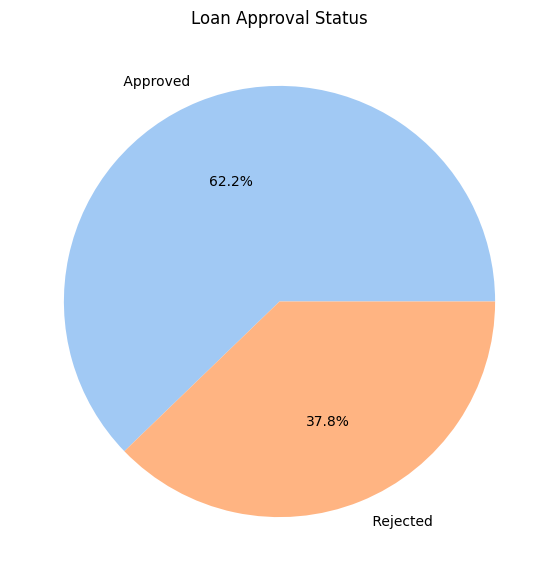

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah setiap kategori dalam Loan_Status
loan_status_count = df['loan_status'].value_counts()

# Visualisasi pie chart menggunakan seaborn
plt.figure(figsize=(7, 7))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Loan Approval Status')
plt.show()

C:\Users\FirzaIrvan\AppData\Local\Temp\ipykernel_23768\2411893022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_count.index, y=education_count.values, palette="pastel")


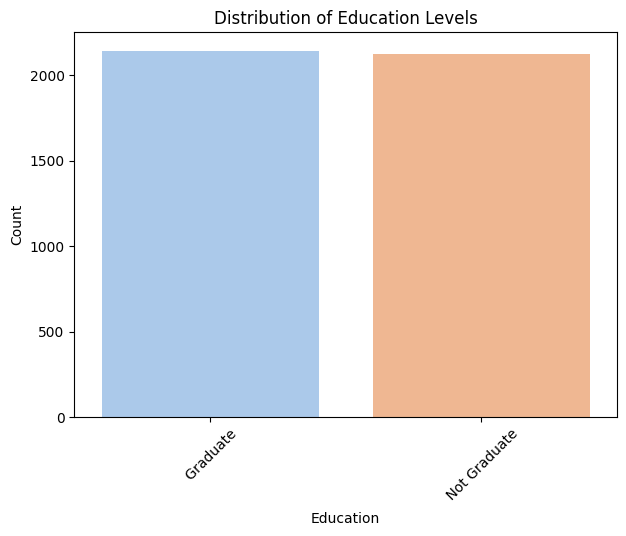

In [8]:
education_count = df['education'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=education_count.index, y=education_count.values, palette="pastel")
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

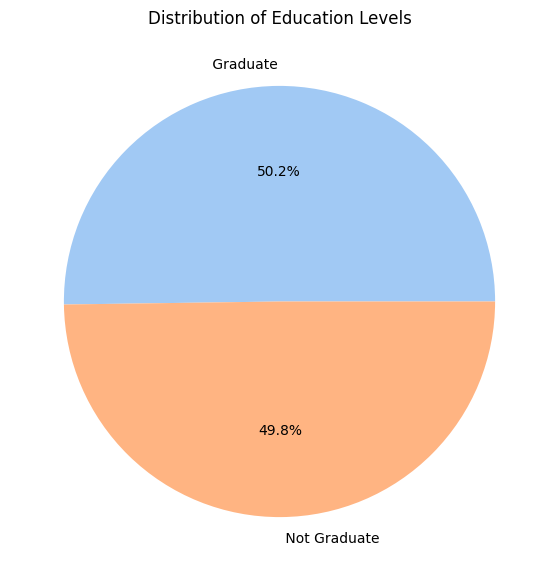

In [9]:
education_count = df['education'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Education Levels')
plt.show()

C:\Users\FirzaIrvan\AppData\Local\Temp\ipykernel_23768\193634044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self_employed_count.index, y=self_employed_count.values, palette="pastel")


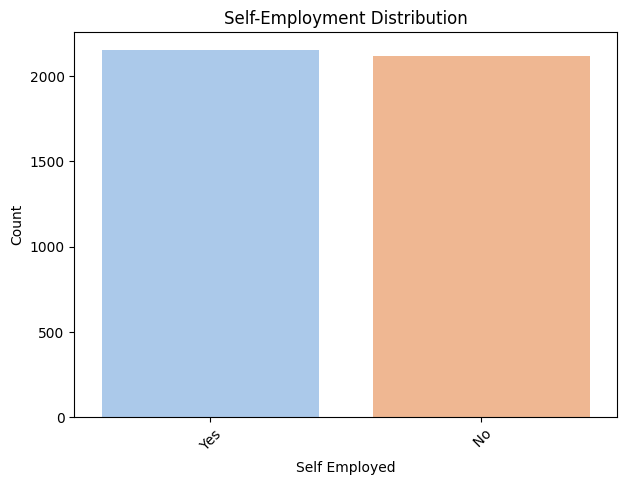

In [10]:

self_employed_count = df['self_employed'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=self_employed_count.index, y=self_employed_count.values, palette="pastel")
plt.title('Self-Employment Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

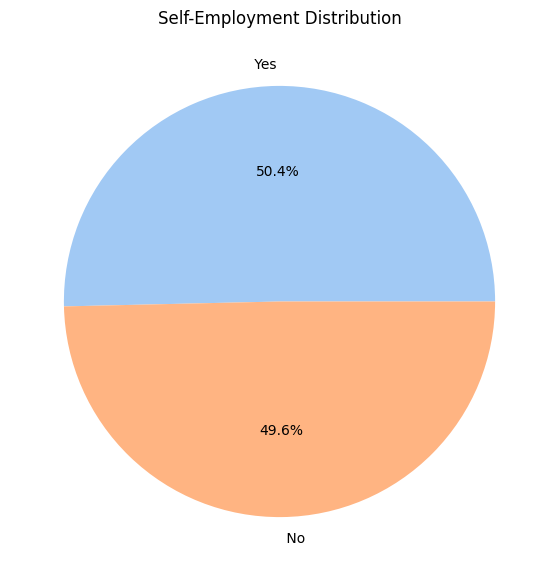

In [11]:
self_employed_count = df['self_employed'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(self_employed_count, labels=self_employed_count.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Self-Employment Distribution')
plt.show()

In [12]:
df.rename(columns={'no_of_dependents': 'dependents'}, inplace=True) #rename kolom dependents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   dependents                4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [13]:
pip install -q -U nbformat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\FirzaIrvan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import plotly.express as px

Income_annum = px.histogram(df, x='income_annum', title='Income Distribution')
Income_annum.show()

In [15]:
fig_income = px.box(df, x='loan_status', 
                    y='income_annum',
                    color="loan_status", 
                    title='Loan_Status vs Income Annum')
fig_income.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   dependents                4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [19]:
print(df.columns)

Index(['dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['education', 'self_employed']
df = pd.get_dummies(df, columns=cat_cols)

In [21]:
# Split the dataset into features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

[' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Rejected' ' 

In [25]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

      dependents  income_annum  loan_amount  loan_term  cibil_score  \
1703    1.512508      0.120278     0.499399   1.587423    -1.029623   
1173   -0.255997      0.298122    -0.129486  -0.510371    -0.007339   
308     0.333504      1.614171     0.521465   0.538526    -0.861179   
1322   -0.255997      0.404829     0.907623  -0.510371     0.027511   
3271    0.333504      0.262554    -0.118453   0.188894     0.800033   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
1703                 -0.148398                 1.154471             0.056278   
1173                 -0.423506                 1.040072             0.285230   
308                  -0.499924                 2.573022             1.451794   
1322                  0.386534                 1.337510             0.721329   
3271                  0.646358                -0.126801             0.023570   

      bank_asset_value  education_ Graduate  education_ Not Graduate  \
1703          0.7273